In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.shape

(4340, 8)

In [5]:
print(df['seller_type'].unique())
print(df['owner'].unique())
print(df['transmission'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Manual' 'Automatic']


In [6]:
df.loc[df['owner'] == 'Test Drive Car', 'owner',] = 0
df.loc[df['owner'] == 'First Owner', 'owner',] = 1
df.loc[df['owner'] == 'Second Owner', 'owner',] = 2
df.loc[df['owner'] == 'Third Owner', 'owner',] = 3
df.loc[df['owner'] == 'Fourth & Above Owner', 'owner',] = 4

In [7]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,1
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,2


In [8]:
# checking missing or null value
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
final_dataset = df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner']]

In [11]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [12]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,1
1,2007,135000,50000,Petrol,Individual,Manual,1
2,2012,600000,100000,Diesel,Individual,Manual,1
3,2017,250000,46000,Petrol,Individual,Manual,1
4,2014,450000,141000,Diesel,Individual,Manual,2


In [13]:
final_dataset['current_year'] = 2023

In [14]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,1,2023
1,2007,135000,50000,Petrol,Individual,Manual,1,2023
2,2012,600000,100000,Diesel,Individual,Manual,1,2023
3,2017,250000,46000,Petrol,Individual,Manual,1,2023
4,2014,450000,141000,Diesel,Individual,Manual,2,2023


In [15]:
final_dataset['car_life'] = final_dataset['current_year'] - final_dataset['year']

In [16]:
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,car_life
0,2007,60000,70000,Petrol,Individual,Manual,1,2023,16
1,2007,135000,50000,Petrol,Individual,Manual,1,2023,16
2,2012,600000,100000,Diesel,Individual,Manual,1,2023,11
3,2017,250000,46000,Petrol,Individual,Manual,1,2023,6
4,2014,450000,141000,Diesel,Individual,Manual,2,2023,9


In [17]:
final_dataset.drop(['year'], axis=1, inplace=True)
final_dataset.drop(['current_year'], axis=1, inplace=True)

In [18]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_life
0,60000,70000,Petrol,Individual,Manual,1,16
1,135000,50000,Petrol,Individual,Manual,1,16
2,600000,100000,Diesel,Individual,Manual,1,11
3,250000,46000,Petrol,Individual,Manual,1,6
4,450000,141000,Diesel,Individual,Manual,2,9


In [19]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

C:\Users\rutul\AppData\Local\Temp\ipykernel_20400\2924572674.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  final_dataset = pd.get_dummies(final_dataset,drop_first=True)


In [20]:
final_dataset.head()

,selling_price,km_driven,car_life,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_1,owner_2,owner_3,owner_4
0,60000,70000,16,0,0,0,1,1,0,1,1,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,1,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,1,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,1,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [21]:
final_dataset.corr()

,selling_price,km_driven,car_life,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_1,owner_2,owner_3,owner_4
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,0.223889,-0.161986,-0.111326,-0.078725
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,-0.299731,0.195203,0.194713,0.097349
car_life,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,-0.438897,0.292349,0.244308,0.186361
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.000878,0.003524,0.009373,-0.021054
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.020804,0.025960,-0.004166,-0.002094
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,-0.033379,0.030141,0.004836,0.013384
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011296,-0.012717,-0.008502,0.011502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,-0.252628,0.186573,0.140823,0.072322
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,0.100430,-0.076764,-0.042578,-0.021395
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,-0.090121,0.068068,0.030802,0.035597


In [22]:
import seaborn as sns

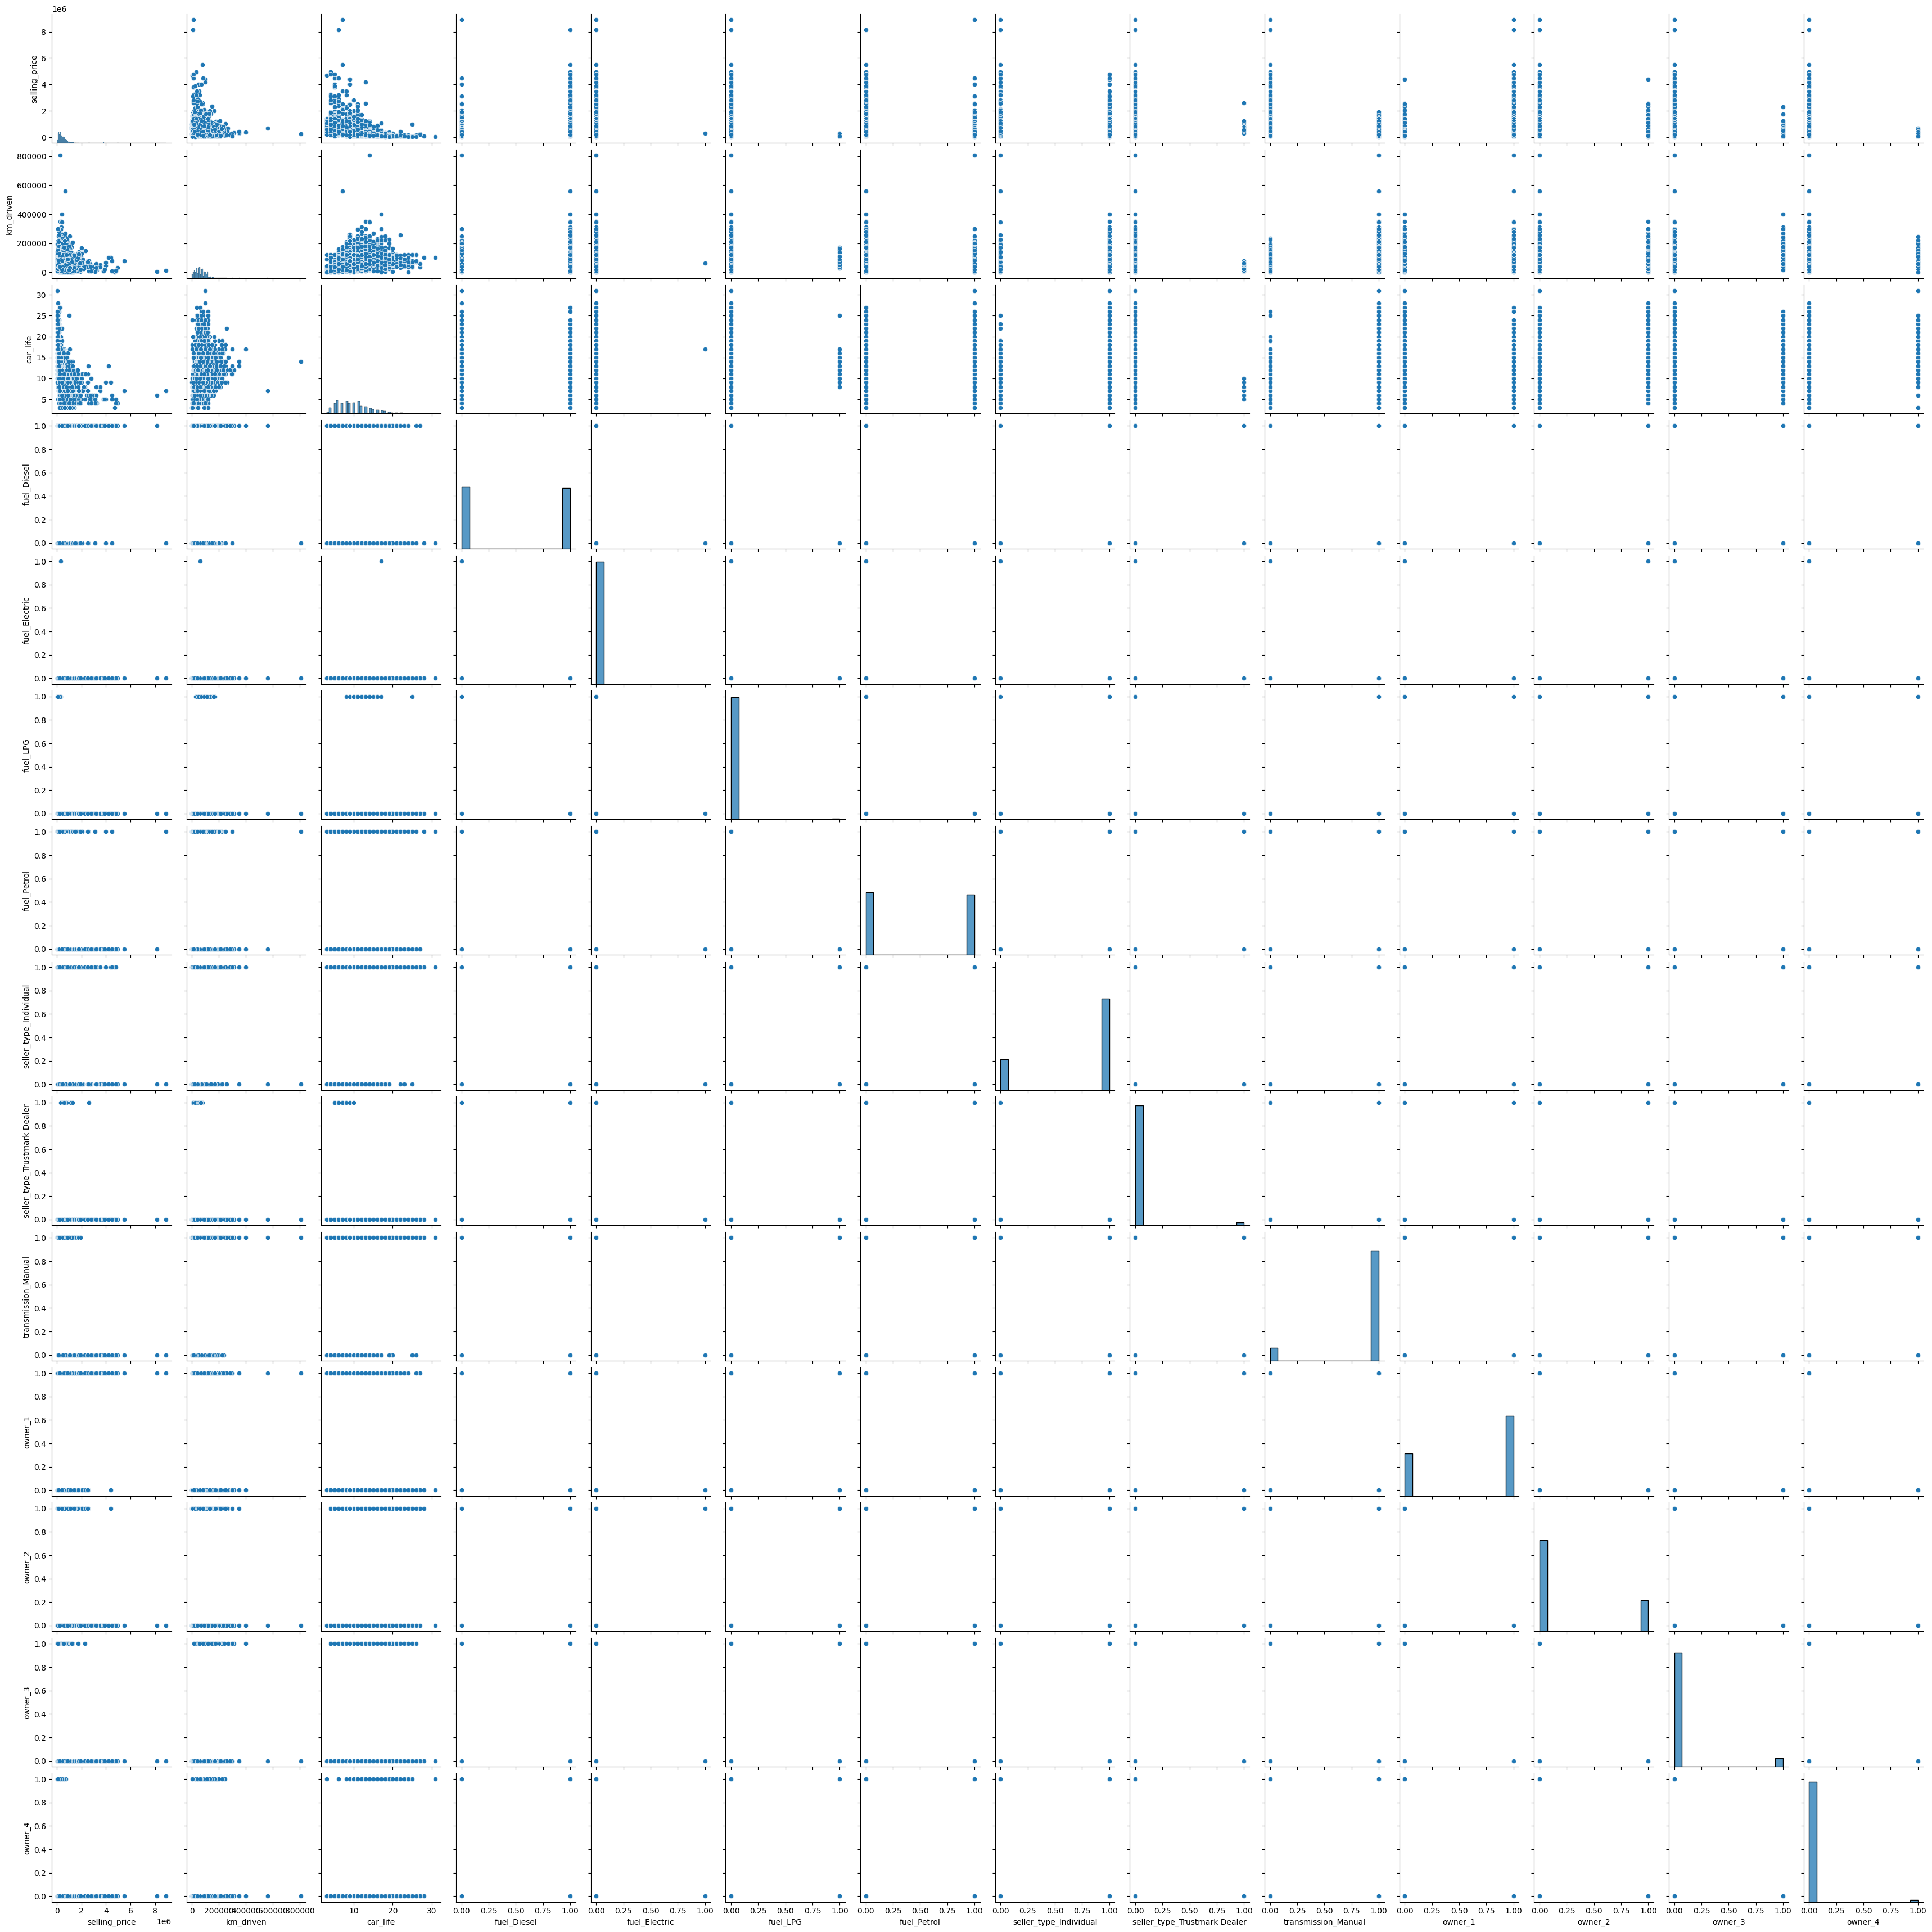

In [23]:
sns.pairplot(final_dataset)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

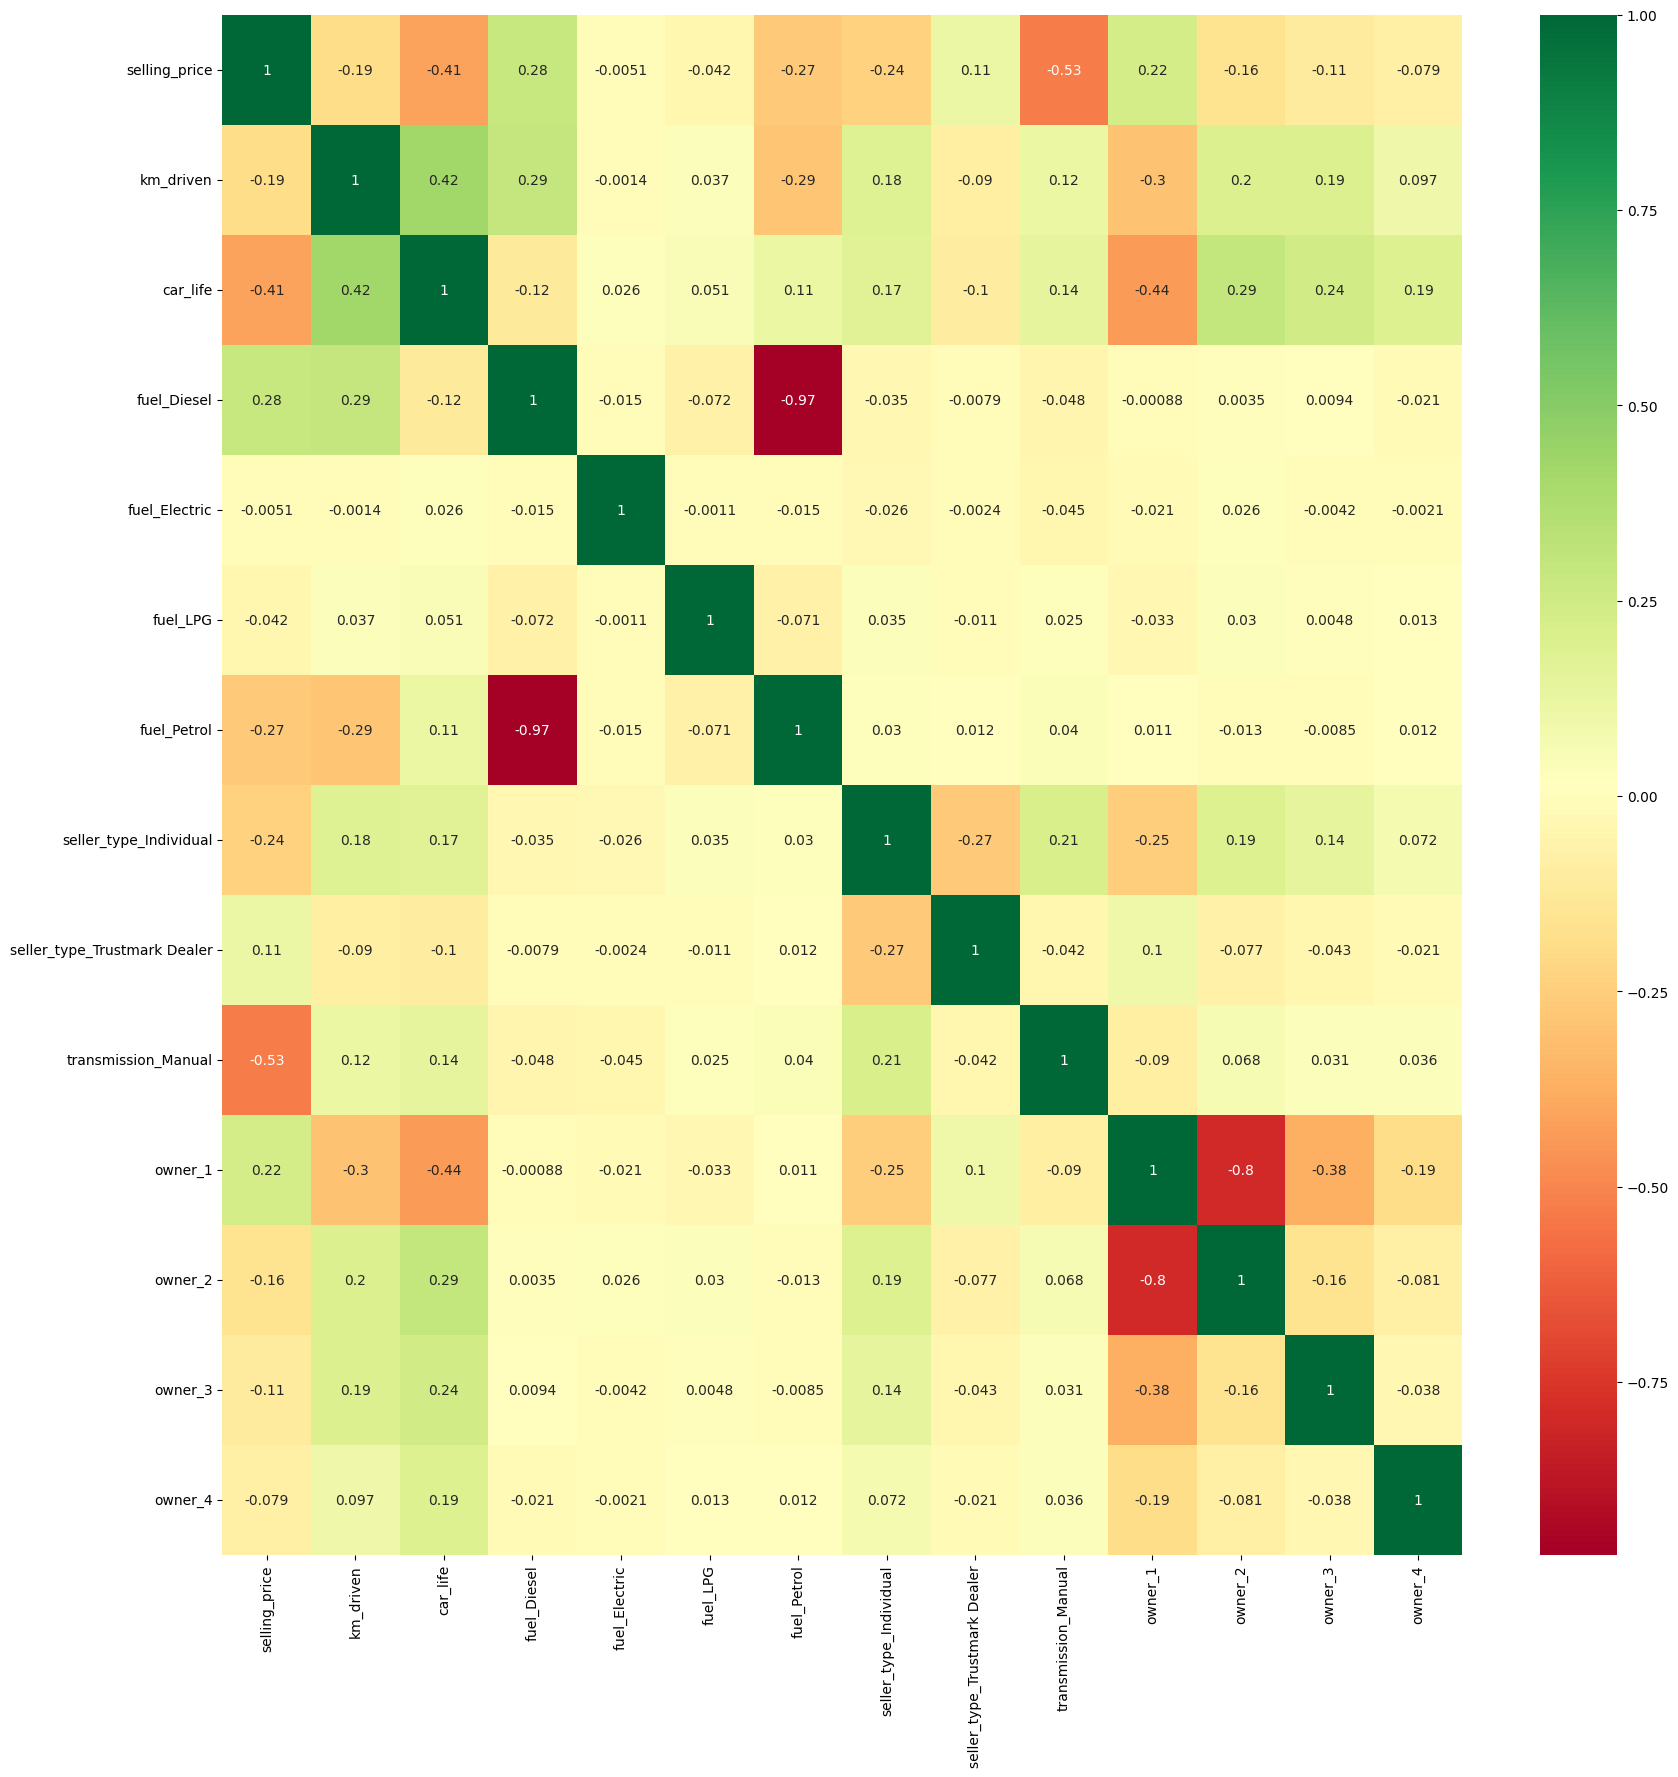

In [31]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g = sns.heatmap(final_dataset[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [32]:
final_dataset.head()

,selling_price,km_driven,car_life,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_1,owner_2,owner_3,owner_4
0,60000,70000,16,0,0,0,1,1,0,1,1,0,0,0
1,135000,50000,16,0,0,0,1,1,0,1,1,0,0,0
2,600000,100000,11,1,0,0,0,1,0,1,1,0,0,0
3,250000,46000,6,0,0,0,1,1,0,1,1,0,0,0
4,450000,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [34]:
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [36]:
x.head()

,km_driven,car_life,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_1,owner_2,owner_3,owner_4
0,70000,16,0,0,0,1,1,0,1,1,0,0,0
1,50000,16,0,0,0,1,1,0,1,1,0,0,0
2,100000,11,1,0,0,0,1,0,1,1,0,0,0
3,46000,6,0,0,0,1,1,0,1,1,0,0,0
4,141000,9,1,0,0,0,1,0,1,0,1,0,0


In [37]:
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [38]:
# feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[2.43312980e-01 2.42871422e-01 1.29947730e-01 1.74160929e-05
 2.36361759e-05 1.99802625e-04 4.84824446e-02 7.13396885e-03
 2.92828231e-01 2.38078950e-02 8.92152907e-03 2.07146556e-03
 3.81478229e-04]


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [44]:
x_train.shape

(3472, 13)

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf_random = RandomForestRegressor()

In [48]:
###typeparameter
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)]


In [49]:
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [50]:
# randomized search CV

# no. of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200, num = 12)]

# no. of features to consider at every split
max_feature = ['auto','sqrt']

#maximum no. of levelsin tree
max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

#minimum no. of sample required to split a node
min_samples_split = [2,5,10,15,100]

#min. no. samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [51]:
from sklearn.model_selection import RandomizedSearchCV

In [71]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_feature,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [72]:
# use random grid to search for the best hyperparameters
# first create the best model to tune
rf = RandomForestRegressor()

In [73]:
rf_random = RandomizedSearchCV(estimator= rf, param_distributions= random_grid, scoring='neg_mean_squared_error', n_iter= 10, cv= 5, random_state=42, n_jobs= 1)

In [74]:
rf_random.fit(x_train,y_train)

C:\mypython310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\mypython310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\mypython310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegres

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
prediction = rf_random.predict(x_test)

In [78]:
prediction[:10]

array([ 191777.71829255,  643466.36327561,  275331.29647381,
       1595973.3531746 ,   75800.        ,  314069.51556277,
       1183613.98491667,  418903.33618539,  948654.63349643,
        560598.5969    ])

C:\Users\rutul\AppData\Local\Temp\ipykernel_20400\943126270.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - prediction)


<AxesSubplot: xlabel='selling_price', ylabel='Density'>

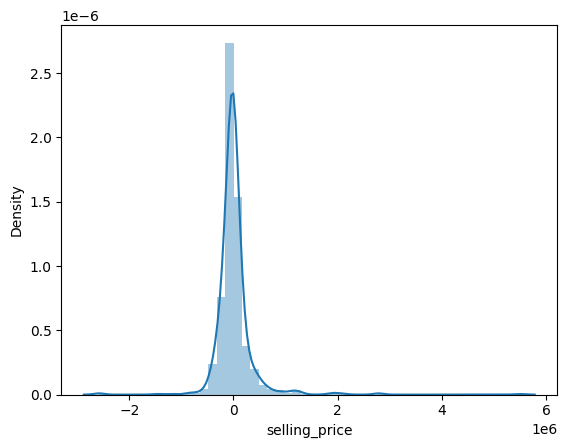

In [81]:
sns.distplot(y_test - prediction)

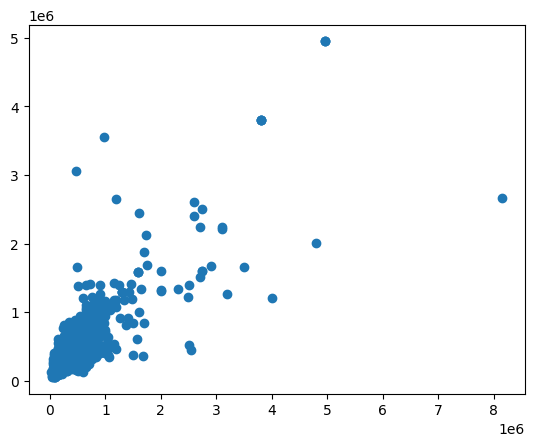

In [82]:
plt.scatter(y_test, prediction)